<a href="https://colab.research.google.com/github/navseducation/Gen-AI-Purdue-Course/blob/main/1_MNIST_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DCGAN  on MNIST

DCGAN is a Generative Adversarial Network (GAN) using CNN.

1. The discriminator learns to discriminate real from fake images.
2. The generator tries to fool the discriminator by generating fake images.
3. The generator + discriminator form an adversarial network.
4. DCGAN trains the discriminator and adversarial networks alternately.

During training, not only the discriminator learns to distinguish real from
fake images, it also coaches the generator part of the Adversarial network on how
to improve its ability to generate fake images.

In [ ]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import os

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Starting GAN Training on CIFAR10 ---
Time for epoch 1 is 85.09 sec
Generator Loss: 1.1408, Discriminator Loss: 1.3888


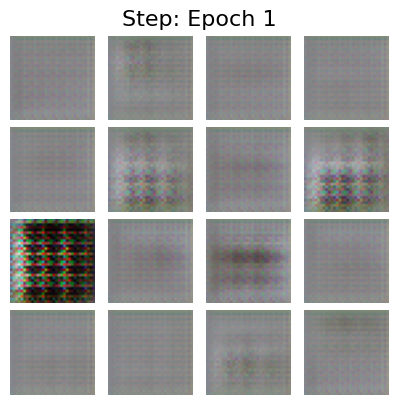

Time for epoch 2 is 80.85 sec
Generator Loss: 1.1893, Discriminator Loss: 1.1199


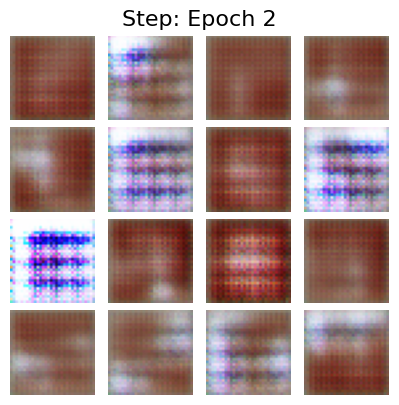

Time for epoch 3 is 80.97 sec
Generator Loss: 1.0246, Discriminator Loss: 1.1705


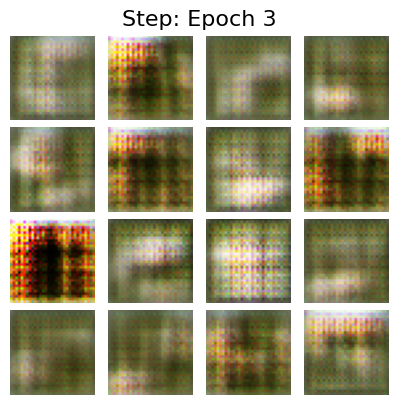

Time for epoch 4 is 81.04 sec
Generator Loss: 0.9042, Discriminator Loss: 1.5967


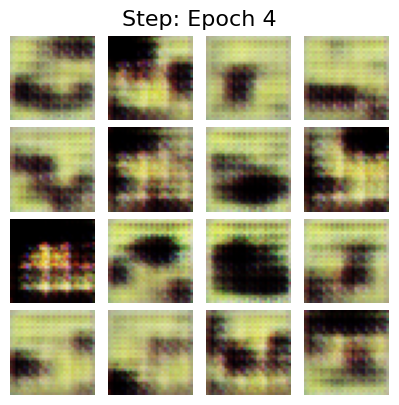

Time for epoch 5 is 81.34 sec
Generator Loss: 0.9478, Discriminator Loss: 1.1225


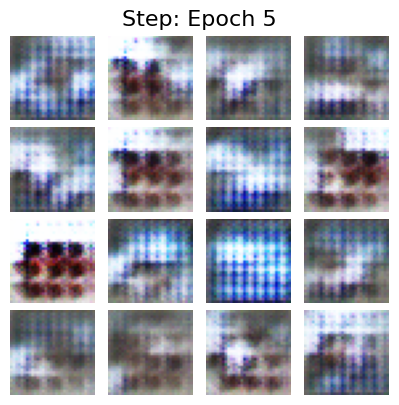

Time for epoch 6 is 81.83 sec
Generator Loss: 1.0387, Discriminator Loss: 1.3078


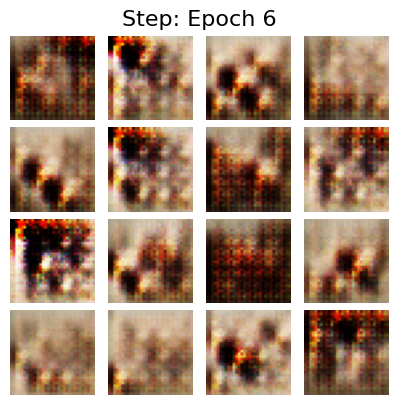

Time for epoch 7 is 82.38 sec
Generator Loss: 1.1672, Discriminator Loss: 1.0081


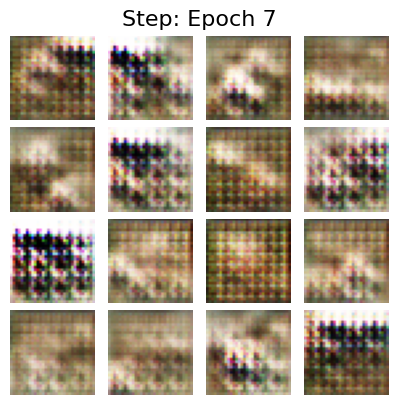

Time for epoch 8 is 81.72 sec
Generator Loss: 1.0966, Discriminator Loss: 1.2447


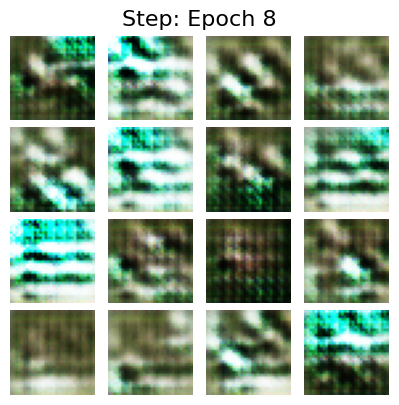

Time for epoch 9 is 82.05 sec
Generator Loss: 1.0173, Discriminator Loss: 1.2969


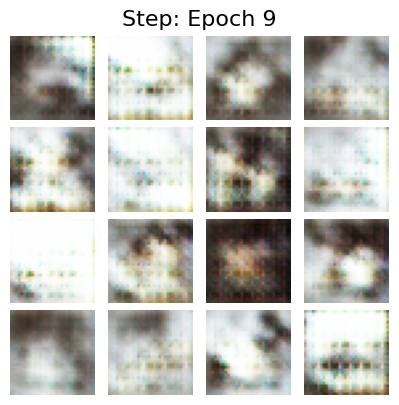

Time for epoch 10 is 81.58 sec
Generator Loss: 0.7843, Discriminator Loss: 1.5331


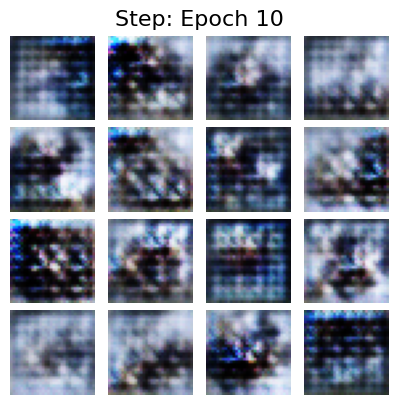

Time for epoch 11 is 81.78 sec
Generator Loss: 1.0434, Discriminator Loss: 1.2932


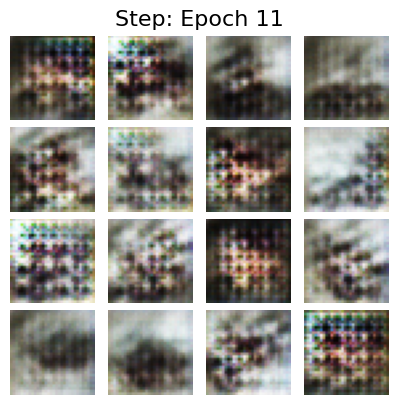

Time for epoch 12 is 81.49 sec
Generator Loss: 1.0870, Discriminator Loss: 1.1305


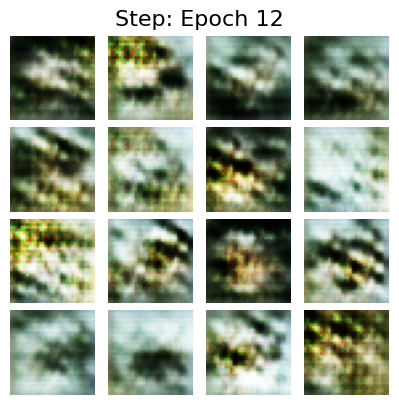

Time for epoch 13 is 81.47 sec
Generator Loss: 0.9510, Discriminator Loss: 1.2424


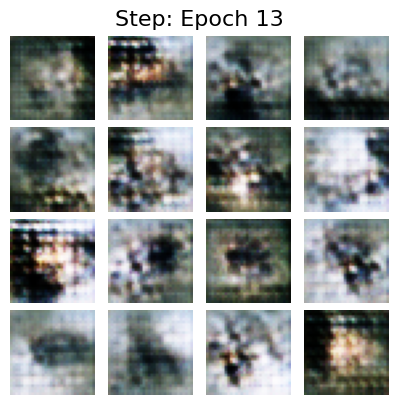

Time for epoch 14 is 81.33 sec
Generator Loss: 1.0681, Discriminator Loss: 1.1271


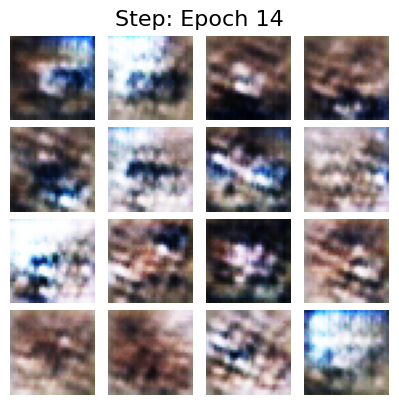

Time for epoch 15 is 81.09 sec
Generator Loss: 0.9182, Discriminator Loss: 1.2350


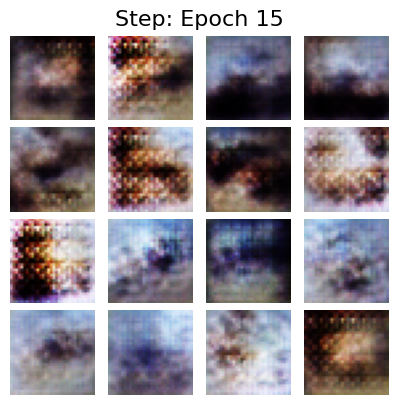

Time for epoch 16 is 81.66 sec
Generator Loss: 1.3758, Discriminator Loss: 0.9912


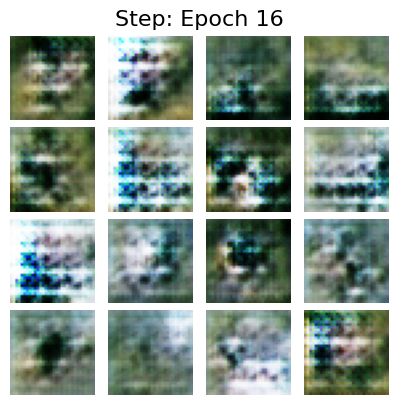

Time for epoch 17 is 81.68 sec
Generator Loss: 1.0979, Discriminator Loss: 1.1539


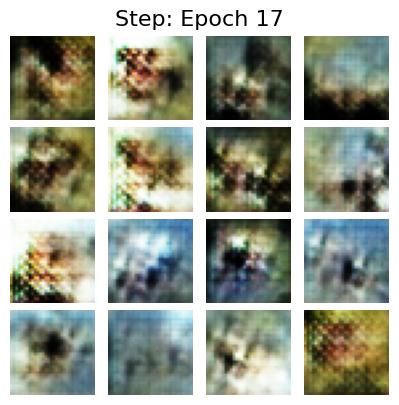

Time for epoch 18 is 80.98 sec
Generator Loss: 0.9905, Discriminator Loss: 1.1477


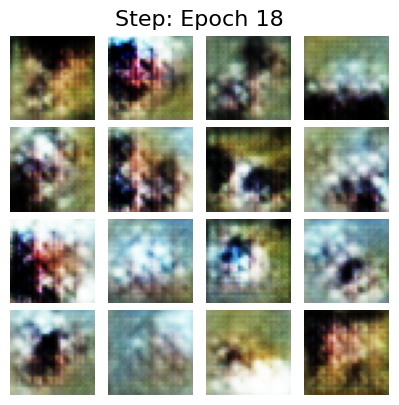

Time for epoch 19 is 80.16 sec
Generator Loss: 1.1003, Discriminator Loss: 1.1831


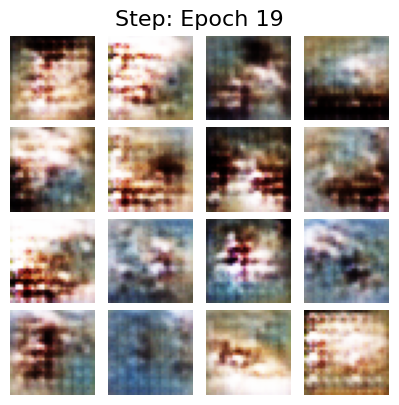

Time for epoch 20 is 80.50 sec
Generator Loss: 1.3127, Discriminator Loss: 1.2848


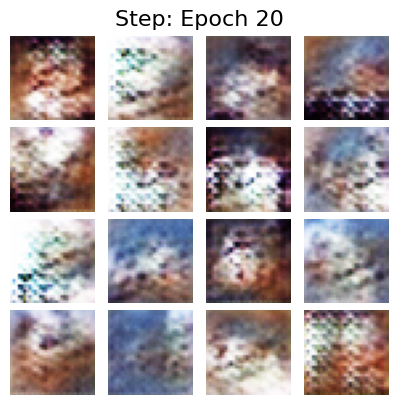

Time for epoch 21 is 80.83 sec
Generator Loss: 1.2288, Discriminator Loss: 1.0874


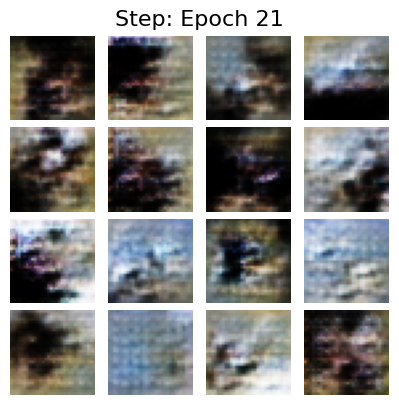

Time for epoch 22 is 80.53 sec
Generator Loss: 1.1994, Discriminator Loss: 1.1480


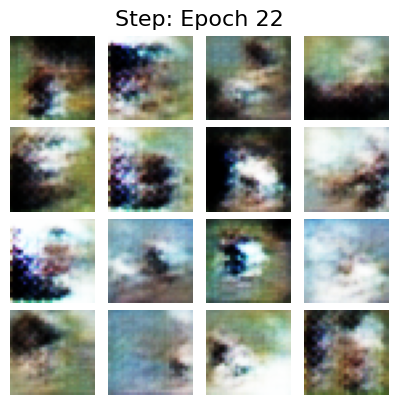

Time for epoch 23 is 80.42 sec
Generator Loss: 0.9619, Discriminator Loss: 1.3537


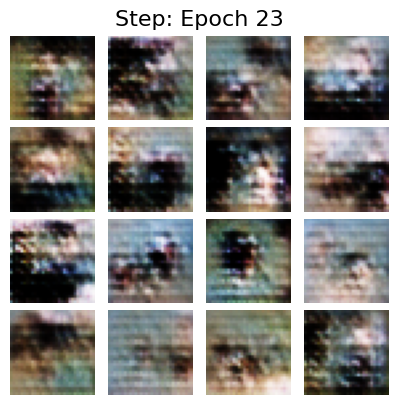

Time for epoch 24 is 80.00 sec
Generator Loss: 1.1036, Discriminator Loss: 1.2630


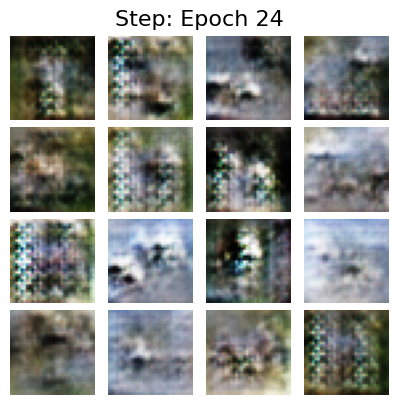

Time for epoch 25 is 80.32 sec
Generator Loss: 0.9535, Discriminator Loss: 1.3433


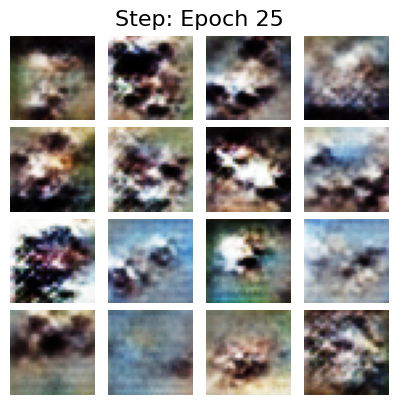

Time for epoch 26 is 79.99 sec
Generator Loss: 1.7509, Discriminator Loss: 1.2250


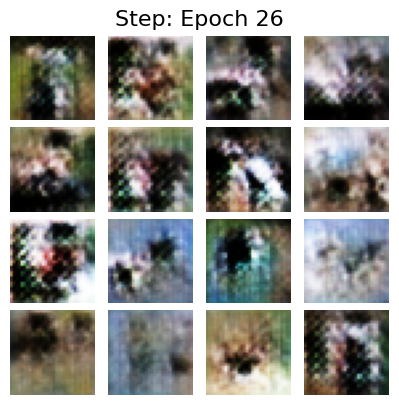

Time for epoch 27 is 80.39 sec
Generator Loss: 1.2345, Discriminator Loss: 1.0584


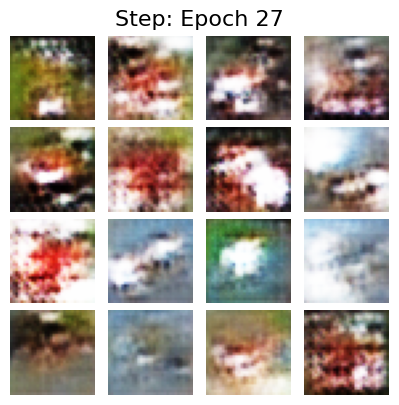

Time for epoch 28 is 80.57 sec
Generator Loss: 1.2502, Discriminator Loss: 1.1099


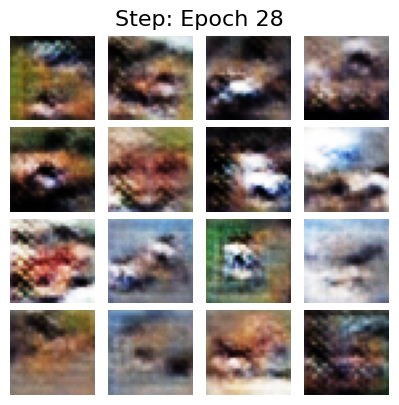

Time for epoch 29 is 80.22 sec
Generator Loss: 1.1362, Discriminator Loss: 1.0903


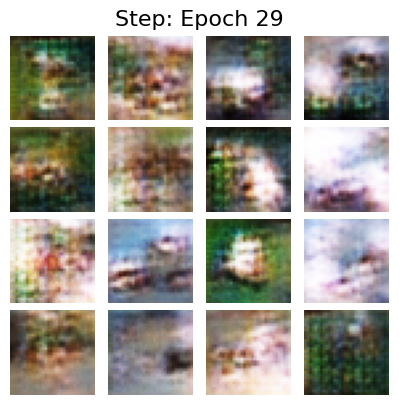

Time for epoch 30 is 80.45 sec
Generator Loss: 1.2015, Discriminator Loss: 1.1080


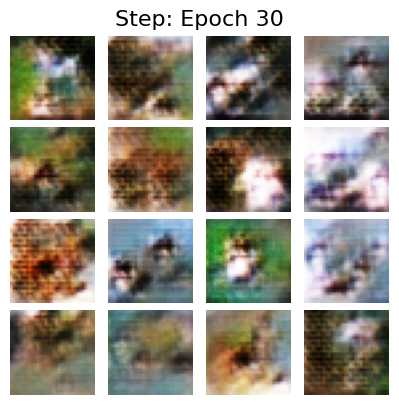

Time for epoch 31 is 80.36 sec
Generator Loss: 1.2671, Discriminator Loss: 1.0362


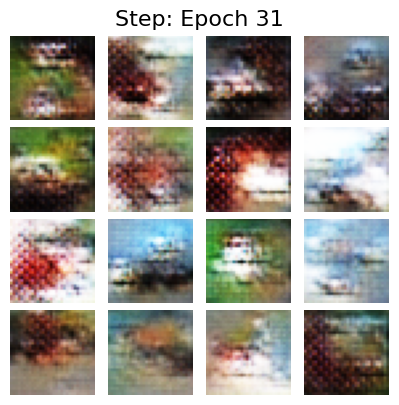

Time for epoch 32 is 80.49 sec
Generator Loss: 1.6068, Discriminator Loss: 1.1004


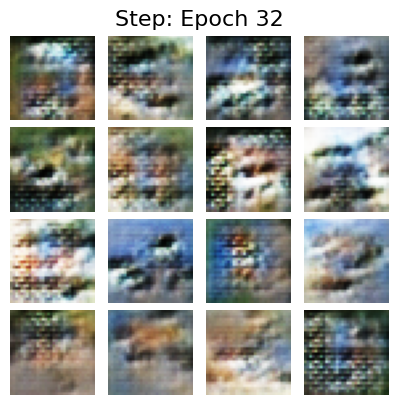

Time for epoch 33 is 80.45 sec
Generator Loss: 1.1419, Discriminator Loss: 1.2825


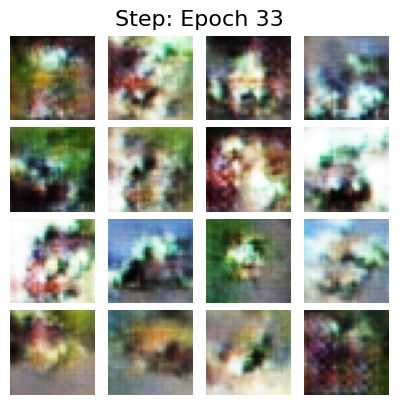

Time for epoch 34 is 80.25 sec
Generator Loss: 1.4267, Discriminator Loss: 1.0286


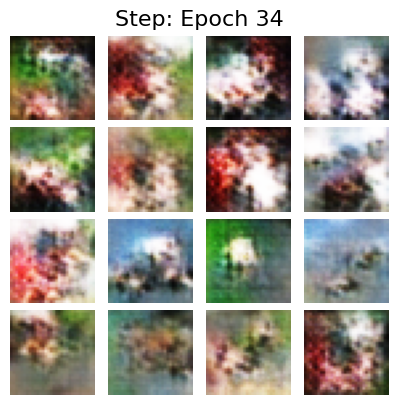

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import time

# --- 1. Generator Model (Stable DCGAN Architecture) ---
# This model takes a random noise vector and upsamples it into a 32x32 color image.
def build_generator(input_size=100):
    """Builds a stable Generator model based on the standard DCGAN architecture for CIFAR10."""
    model = tf.keras.Sequential(name="Generator")
    # Initial dense layer to project and reshape the noise vector
    model.add(tf.keras.layers.Dense(4 * 4 * 512, use_bias=False, input_shape=(input_size,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Reshape((4, 4, 512))) # Reshape to a 4x4 feature map

    # Upsampling layers
    model.add(tf.keras.layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False)) # 4x4 -> 8x8
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)) # 8x8 -> 16x16
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)) # 16x16 -> 32x32
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    # Output layer to generate a 32x32x3 image
    model.add(tf.keras.layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    return model

# --- 2. Discriminator Model (Stable DCGAN Architecture) ---
# This model takes an image and outputs a single value indicating if it's real or fake.
def build_discriminator(data_shape=(32, 32, 3)):
    """Builds a stable Discriminator model for CIFAR10."""
    model = tf.keras.Sequential(name="Discriminator")
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=data_shape)) # 32x32 -> 16x16
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')) # 16x16 -> 8x8
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same')) # 8x8 -> 4x4
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))
    return model


# --- 3. Image Plotting Utility ---
# This helper function plots a grid of generated images.
def plot_images(model, test_input, step=None):
    """Generates and plots a grid of 16 images from the generator model."""
    predictions = model(test_input, training=False)
    # Denormalize image pixels to the range [0, 1] for plotting
    predictions = (predictions + 1) / 2.0
    plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        # If images are grayscale, use cmap='gray'. For color, remove cmap.
        plt.imshow(predictions[i, :, :, :])
        plt.axis('off')
    if step is not None:
        plt.suptitle(f"Step: {step}", fontsize=16)
    plt.tight_layout(pad=0.5)
    plt.show()


# --- 4. Main Training Function (Using a Stable, Explicit Loop) ---
def train_gan(noise_size=100, epochs=50, batch_size=256):
    """The main training loop, using a stable and explicit GradientTape approach."""

    # --- Load and Prepare Dataset (CIFAR10) ---
    (train_images, _), (_, _) = tf.keras.datasets.cifar10.load_data()
    # Reshape and normalize the images to the range [-1, 1]
    train_images = train_images.astype('float32')
    train_images = (train_images - 127.5) / 127.5

    # --- Build Models and Optimizers ---
    # Update the data_shape for the discriminator to (32, 32, 3) for CIFAR10
    generator = build_generator(noise_size)
    discriminator = build_discriminator(data_shape=(32, 32, 3))


    generator_optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)

    # --- Loss Functions ---
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    def discriminator_loss(real_output, fake_output):
        # Using label smoothing for real images (0.9 instead of 1.0)
        real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        return real_loss + fake_loss

    def generator_loss(fake_output):
        # Generator wants to fool the discriminator into thinking fake images are real (target is 1.0)
        return cross_entropy(tf.ones_like(fake_output), fake_output)

    # --- Training Loop ---
    # Generate a fixed seed noise for visualizing progress
    seed = tf.random.normal([16, noise_size])

    print("--- Starting GAN Training on CIFAR10 ---")
    for epoch in range(epochs):
        start_time = time.time()

        # Shuffle the data at the start of each epoch
        np.random.shuffle(train_images)
        num_batches = train_images.shape[0] // batch_size

        for i in range(num_batches):
            # Get a batch of real images
            real_images = train_images[i*batch_size:(i+1)*batch_size]
            noise = tf.random.normal([batch_size, noise_size])

            # Use tf.GradientTape to record operations for automatic differentiation
            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                generated_images = generator(noise, training=True)

                real_output = discriminator(real_images, training=True)
                fake_output = discriminator(generated_images, training=True)

                gen_loss = generator_loss(fake_output)
                disc_loss = discriminator_loss(real_output, fake_output)

            # Calculate and apply gradients to update the models
            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        # At the end of each epoch, log progress and plot images
        print(f'Time for epoch {epoch + 1} is {time.time() - start_time:.2f} sec')
        print(f'Generator Loss: {gen_loss:.4f}, Discriminator Loss: {disc_loss:.4f}')
        plot_images(generator, seed, f"Epoch {epoch + 1}")

    print("\n--- Final Generated Images (CIFAR10) ---")
    plot_images(generator, seed, "Final")
    # Save the generator model
    generator.save('cifar10_generator_dcgan_final.h5')


# --- Main Execution Block ---
if __name__ == '__main__':
    # Simply call the main training function to run everything
    train_gan()